In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('lemmatized_dataset_final.csv')

In [7]:
!pip install pandas matplotlib seaborn


In [13]:
# Print the initial stance distribution
print("Initial distribution of stances:")
print(df['Stance'].value_counts(normalize=True) * 100)

Initial distribution of stances:
Stance
unrelated    73.130953
discuss      17.827984
agree         7.360122
disagree      1.680941
Name: proportion, dtype: float64


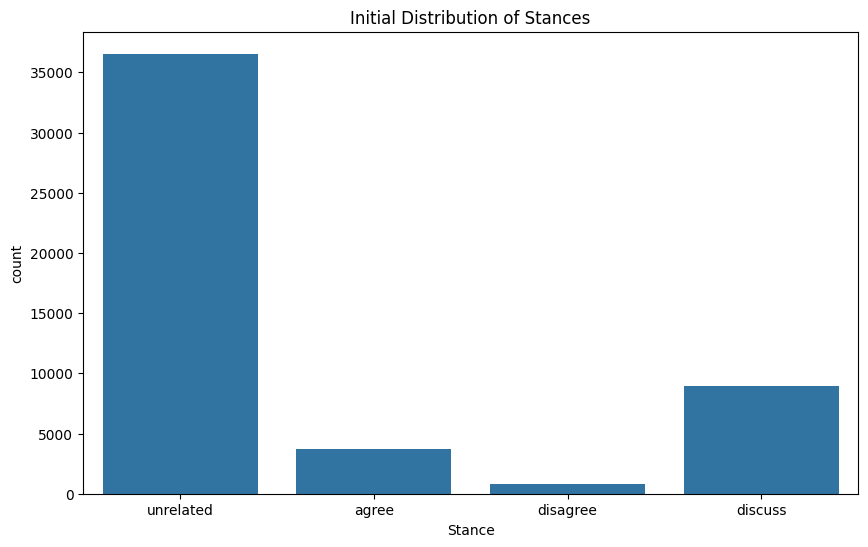

In [14]:
# Plot initial distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stance', data=df)
plt.title('Initial Distribution of Stances')
plt.show()

In [9]:
# Calculate the total number of records for each stance
stance_counts = df['Stance'].value_counts()

In [15]:
# Calculate the total number of records needed for non-'unrelated' stances to make up 50% of the dataset
non_unrelated_total = stance_counts.sum() - stance_counts['unrelated']
required_unrelated = non_unrelated_total  # To achieve 50% distribution

In [16]:
# Randomly sample 'unrelated' stance records
unrelated_sample = df[df['Stance'] == 'unrelated'].sample(n=required_unrelated, random_state=1)


In [17]:
# Concatenate the 'unrelated' sample with the rest of the stances
balanced_df = pd.concat([unrelated_sample, df[df['Stance'] != 'unrelated']])


In [19]:
# Print the balanced stance distribution
print("\nBalanced distribution of stances:")
print(balanced_df['Stance'].value_counts(normalize=True) * 100)


Balanced distribution of stances:
Stance
unrelated    50.000000
discuss      33.175691
agree        13.696284
disagree      3.128026
Name: proportion, dtype: float64


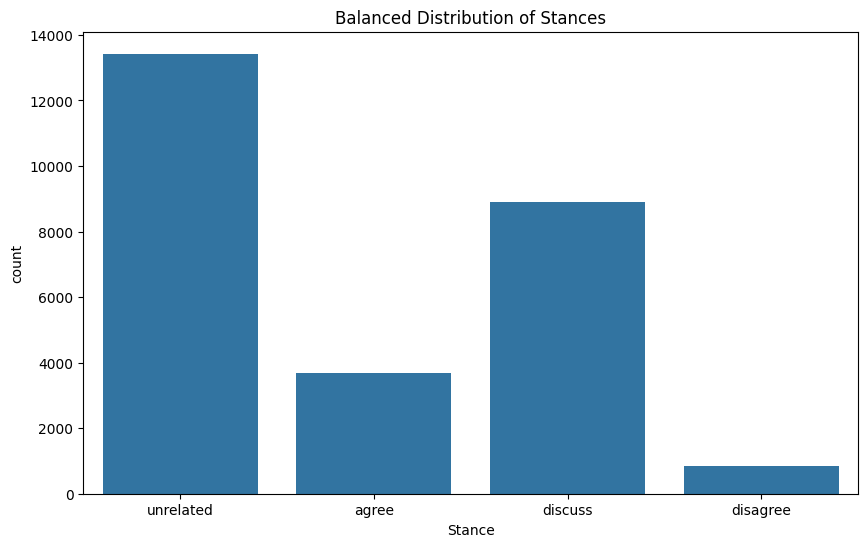

In [20]:
# Plot balanced distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stance', data=balanced_df)
plt.title('Balanced Distribution of Stances')
plt.show()

In [21]:
# Print part of the balanced DataFrame
print("\nPart of the balanced DataFrame:")
print(balanced_df.head())


Part of the balanced DataFrame:
                                            Headline  Body ID     Stance  \
0  luke somers sister say he wa killed in failed ...     1165  unrelated   
1  somalia shebab chief ahmed abdi godane likely ...     1853  unrelated   
2  isi beheads american photojournalist james wri...     1747      agree   
3  report the batmobile might have been stolen in...     1538    discuss   
4             vladimir putin bird poop video is fake     1028  unrelated   

                                         articleBody  stance_cat  
0  a the anniversary of sept 11 approach there ar...           3  
1  a dog wa found abandoned at a scottish train s...           3  
2  a message from jims mom diane foley we have ne...           0  
3  only in detroit holy stolen batmobile batman a...           2  
4  a fisherman ha caught a giant 8ft 9in long cat...           3  


In [22]:
# Save the balanced dataset to a new CSV file
balanced_df.to_csv('lemmatized_dataset_final_balanced.csv', index=False)

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'balanced_df' is your balanced DataFrame

# First split: Separate training set and a temporary set (for test and validation)
train_df, temp_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['Stance'])

# For the second split, we also need to stratify based on the 'Stance' column
# This ensures the test and validation sets have the same distribution of 'Stance' as the temporary set
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Stance'])

# Now you have three sets: train_df (80%), test_df (10%), and validation_df (10%)

# Save the datasets to CSV files
train_df.to_csv('lemmatized_dataset_final_balanced_train.csv', index=False)
test_df.to_csv('lemmatized_dataset_final_balanced_test.csv', index=False)
validation_df.to_csv('lemmatized_dataset_final_balanced_validation.csv', index=False)
